## Summary 
In this notebook we use principal component decomposition to generate orthogonal feature sets from a series of images. We can then reconstruct 'fake' images as a random combination of the principal components of the 'real' image dataset.

In [1]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
sys.path.insert(0, os.getcwd()+"/Models")
from sklearn.decomposition import PCA
from skimage.io import imshow, imread
import numpy as np
import matplotlib.pyplot as plt
from img_utils import generate_subimages
import random
import zipfile
import h5py

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### User-Defined Variables

In [19]:
num_components = 15 # Number of principal components to compute
img_size=128 #Size of sub-images to generate from large input image in dataset (assuming width = height)
overlap = 20 # Overlap between subimages 
image_file = 'Data/sem_image.PNG' #Image file that we will section

#### Generate image matrix
Image matrix should be of size $(s \times n)$ where $s=$number of pixels in each sample and $n$ equals number of sample images

In [9]:
zip_ref = zipfile.ZipFile('Data\\unsegmented_slices_volumetric.zip', 'r')
zip_ref.extractall('Data\\3D')
zip_ref.close()

In [10]:
datafile = h5py.File('Data\\3D\\slice.mat','r')
data_3D = np.array(datafile.get('slice'))

In [11]:
# x_test = generate_subimages(image_file,img_size, overlap)
x_test = data_3D;
width = x_test.shape[1]
height = x_test.shape[2]
num_samples = x_test.shape[0]
#Vectorize sub-images into matrix with each col representing one image
img_array=np.zeros((width*height,num_samples),dtype='uint8')
for i in range(num_samples):
    img_array[:,i] = np.squeeze(x_test[i,:,:]).reshape((width*height))

#### Calculate Principal Components

The following will use SVD to calculate the first $p$ principal components where $p$ is defined as num_components in the user defined variables section
output variable *pc_vectors* contains the $p$ principal components with each column holding one principal component. It can be informative to show a few of these components so *pc_array* stores the principal components as arrays that we can plot in the next cell. The output variable *pca_array* is also normalized at this step.

In [20]:
pca = PCA(n_components=num_components)
pca.fit(img_array)
pc_vectors = pca.transform(img_array)

pc_array = np.zeros((width,height,num_components))
for i in range(num_components):
    this_vector = pc_vectors[:,i];
    this_vector = this_vector# /np.linalg.norm(this_vector)
    pc_array[:,:,i]=this_vector.reshape((width,height))

#### Plot first few principal components

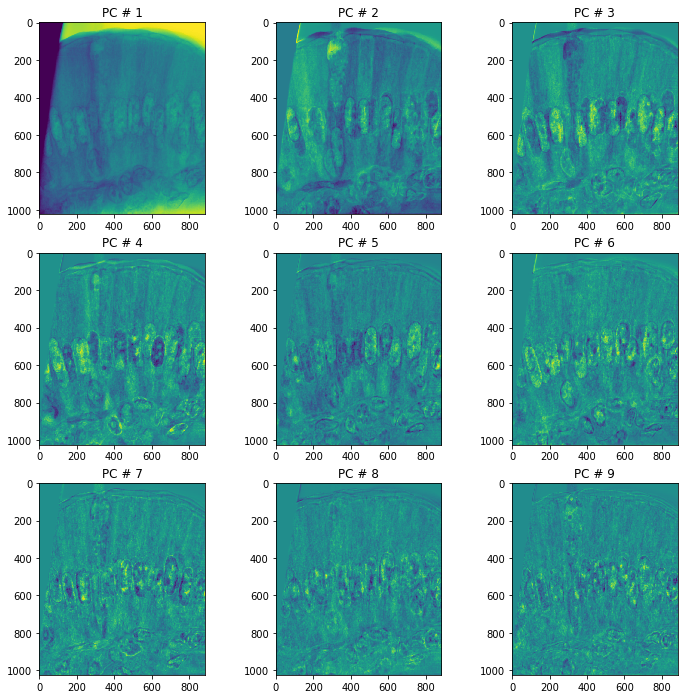

In [21]:
fig = plt.figure(figsize=(12,12))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)

    pc_array_image = pc_array[:,:,i]
    pc_array_image = (pc_array_image - pc_array_image.min())
    pc_array_image/=pc_array_image.max()
    ax.imshow(pc_array_image)
    plt.title('PC # '+str(i+1))


#### Generate "Random" generated images

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


Text(0.5,1,'Sub-Image from Real Data')

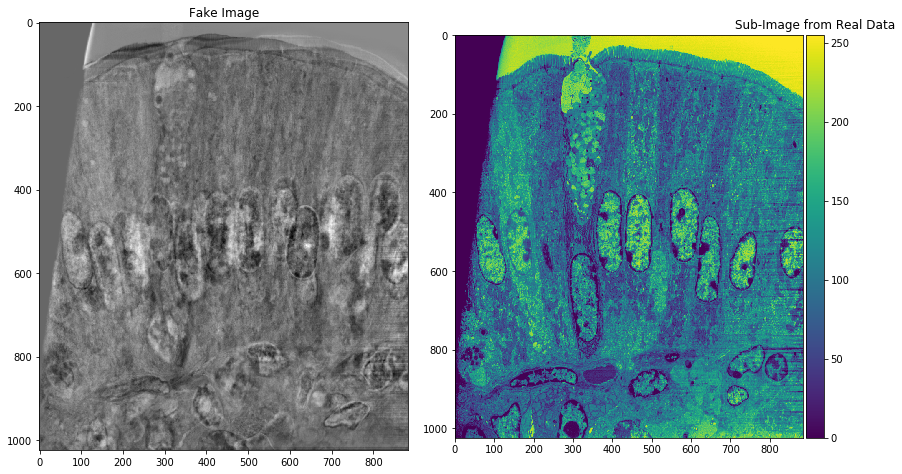

In [26]:
fig = plt.figure(figsize=(12,12))
randoms=np.random.rand(num_components,)
randoms = randoms/np.linalg.norm(randoms)
random_img = np.zeros((width,height))
for i in range(num_components):
    random_img+= pc_array[:,:,i]*randoms[i]
    
random_img = (random_img - random_img.min())
random_img/= random_img.max()
ax1 = fig.add_subplot(1,2,1)
imshow(random_img,cmap='gray')
plt.title('Fake Image')

id = random.randint(0,x_test.shape[0])
ax2 = fig.add_subplot(1,2,2)
imshow(np.squeeze(x_test[id]))
plt.title('Sub-Image from Real Data')


In [4]:
os.getcwd()

'C:\\users\\aduen\\Projects\\ImageSegmentation'

In [28]:
hf = h5py.File('data.h5', 'w')

OSError: Unable to create file (unable to open file: name = '\Data\segmented_data.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

In [29]:
hf.create_dataset('slices', data=data_3D)
hf.close()